# Importing Packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
# plt.style.use('ggplot')

# Loading Data

In [3]:
# load data
items = pd.read_csv("/content/drive/MyDrive/資料科學與人工智慧競技/final project/dataset/items.csv")
shops = pd.read_csv("/content/drive/MyDrive/資料科學與人工智慧競技/final project/dataset/shops.csv")
item_categories = pd.read_csv("/content/drive/MyDrive/資料科學與人工智慧競技/final project/dataset/item_categories.csv")
train = pd.read_csv("/content/drive/MyDrive/資料科學與人工智慧競技/final project/dataset/sales_train.csv")
test = pd.read_csv("/content/drive/MyDrive/資料科學與人工智慧競技/final project/dataset/test.csv")

# Data Preprocessing

### Find outliers in the columns sales.'item_cnt_day',sales_train.'item_price'

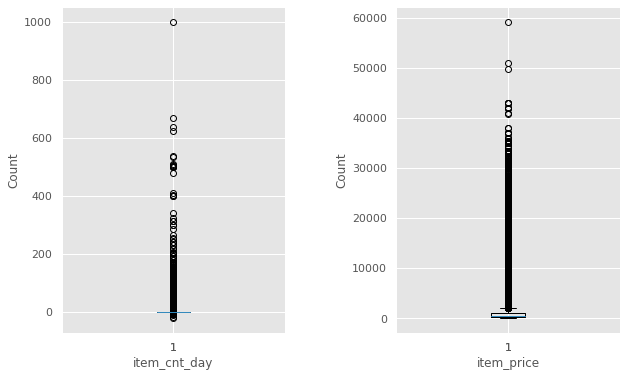

In [9]:
# Data Cleaning
# Find outliers in the columns sales.'item_cnt_day',sales_train.'item_price'
cols = ['item_cnt_day','item_price']
fig, ax = plt.subplots(ncols = len(cols), figsize = (5 * len(cols),6), sharex = True)
fig.subplots_adjust(wspace=0.5)

for i in range(len(cols)):
  ax[i].boxplot(train[cols[i]])
  ax[i].set_xlabel(cols[i])
  ax[i].set_ylabel("Count")

In [5]:
# Remove Outliers
outlier1 = train[train['item_cnt_day'] > 2000].index[0]
outlier2 = train[train['item_price'] > 300000].index[0]
train.drop([outlier1,outlier2], axis = 0, inplace = True)

# Reset index
train.reset_index(inplace=True,drop=True)

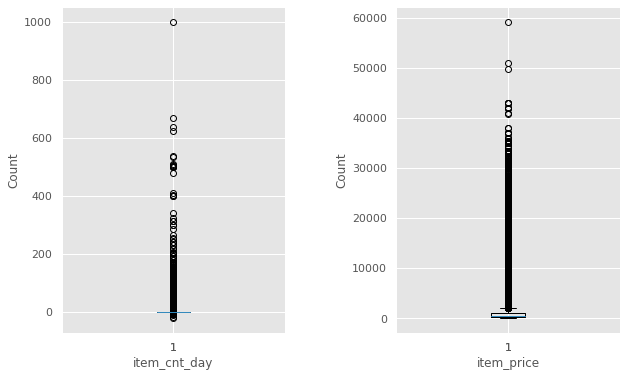

In [10]:
# After Remove Outliers
cols = ['item_cnt_day','item_price']
fig, ax = plt.subplots(ncols = len(cols), figsize = (5 * len(cols),6), sharex = True)
fig.subplots_adjust(wspace=0.5)

for i in range(len(cols)):
  ax[i].boxplot(train[cols[i]])
  ax[i].set_xlabel(cols[i])
  ax[i].set_ylabel("Count")

### Find anomalies in the columns sales.'item_cnt_day',sales_train.'item_price'

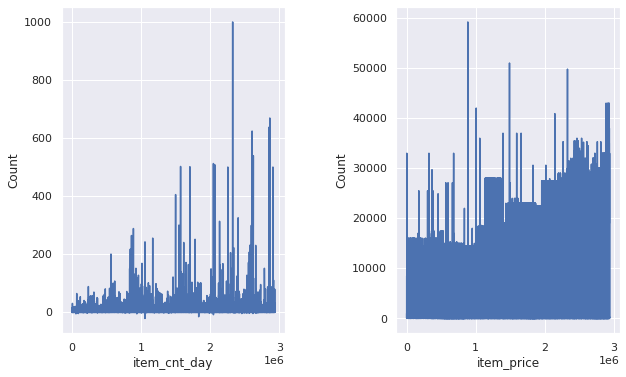

In [13]:
# Find anomalies in the columns sales.'item_cnt_day',sales_train.'item_price'
cols = ['item_cnt_day','item_price']
fig, ax = plt.subplots(ncols = len(cols), figsize = (5 * len(cols),6), sharex = True)
fig.subplots_adjust(wspace=0.5)

for i in range(len(cols)):
  ax[i].plot(train[cols[i]])
  ax[i].set_xlabel(cols[i])
  ax[i].set_ylabel("Count")

### Combine duplicated feature values into a single feature value

In [15]:
# Cleaning shops data
# Якутск Орджоникидзе, 56
train.loc[train.shop_id == 0, 'shop_id'] = 57
test.loc[test.shop_id == 0, 'shop_id'] = 57
# Якутск ТЦ "Центральный"
train.loc[train.shop_id == 1, 'shop_id'] = 58
test.loc[test.shop_id == 1, 'shop_id'] = 58
# Жуковский ул. Чкалова 39м²
train.loc[train.shop_id == 10, 'shop_id'] = 11
test.loc[test.shop_id == 10, 'shop_id'] = 11

### Clean up some shop names and add latitude, longitude, and area code to shops df.

In [17]:
# Clean up some shop names and add 'city' and 'category' to shops df.
from sklearn.preprocessing import LabelEncoder
shops['city'] = shops['shop_name'].apply(lambda x: x.split()[0].lower())
shops.loc[shops.city == '!якутск', 'city'] = 'якутск'
shops['city_code'] = LabelEncoder().fit_transform(shops['city'])

In [18]:
# latitude, longitude, and area code
coords = dict()
coords['якутск'] = (62.028098, 129.732555, 4)
coords['адыгея'] = (44.609764, 40.100516, 3)
coords['балашиха'] = (55.8094500, 37.9580600, 1)
coords['волжский'] = (53.4305800, 50.1190000, 3)
coords['вологда'] = (59.2239000, 39.8839800, 2)
coords['воронеж'] = (51.6720400, 39.1843000, 3)
coords['выездная'] = (0, 0, 0)
coords['жуковский'] = (55.5952800, 38.1202800, 1)
coords['интернет-магазин'] = (0, 0, 0)
coords['казань'] = (55.7887400, 49.1221400, 4)
coords['калуга'] = (54.5293000, 36.2754200, 4)
coords['коломна'] = (55.0794400, 38.7783300, 4)
coords['красноярск'] = (56.0183900, 92.8671700, 4)
coords['курск'] = (51.7373300, 36.1873500, 3)
coords['москва'] = (55.7522200, 37.6155600, 1)
coords['мытищи'] = (55.9116300, 37.7307600, 1)
coords['н.новгород'] = (56.3286700, 44.0020500, 4)
coords['новосибирск'] = (55.0415000, 82.9346000, 4)
coords['омск'] = (54.9924400, 73.3685900, 4)
coords['ростовнадону'] = (47.2313500, 39.7232800, 3)
coords['спб'] = (59.9386300, 30.3141300, 2)
coords['самара'] = (53.2000700, 50.1500000, 4)
coords['сергиев'] = (56.3000000, 38.1333300, 4)
coords['сургут'] = (61.2500000, 73.4166700, 4)
coords['томск'] = (56.4977100, 84.9743700, 4)
coords['тюмень'] = (57.1522200, 65.5272200, 4)
coords['уфа'] = (54.7430600, 55.9677900, 4)
coords['химки'] = (55.8970400, 37.4296900, 1)
coords['цифровой'] = (0, 0, 0)
coords['чехов'] = (55.1477000, 37.4772800, 4)
coords['ярославль'] = (57.6298700, 39.8736800, 2) 

shops['city_coord_1'] = shops['city'].apply(lambda x: coords[x][0])
shops['city_coord_2'] = shops['city'].apply(lambda x: coords[x][1])
shops['country_part'] = shops['city'].apply(lambda x: coords[x][2])
shops = shops[['shop_id', 'city_code', 'city_coord_1', 'city_coord_2', 'country_part']]

### Clean item category data

In [20]:
# Cleaning Item Category Data
item_categories["type_code"] = item_categories.item_category_name.apply( lambda x: x.split(" ")[0] ).astype(str)
item_categories.loc[ (item_categories.type_code == "Игровые")| (item_categories.type_code == "Аксессуары"), "category" ] = "Игры"
category = []
for cat in item_categories.type_code.unique():
    if len(item_categories[item_categories.type_code == cat]) >= 5: 
        category.append( cat )
item_categories.type_code = item_categories.type_code.apply(lambda x: x if (x in category) else "etc")
# Label Encoding
item_categories.type_code = LabelEncoder().fit_transform(item_categories.type_code)
item_categories["split"] = item_categories.item_category_name.apply(lambda x: x.split("-"))
item_categories["subtype"] = item_categories.split.apply(lambda x: x[1].strip() if len(x) > 1 else x[0].strip())
item_categories["subtype_code"] = LabelEncoder().fit_transform(item_categories["subtype"] )
item_categories = item_categories[["item_category_id", "subtype_code", "type_code"]]

### Clean item data

In [22]:
# Cleaning Item Data
import re
def name_correction(x):
    x = x.lower() # all letters lower case
    x = x.partition('[')[0] # partition by square brackets
    x = x.partition('(')[0] # partition by curly brackets
    x = re.sub('[^A-Za-z0-9А-Яа-я]+', ' ', x) # remove special characters
    x = x.replace('  ', ' ') # replace double spaces with single spaces
    x = x.strip() # remove leading and trailing white space
    return x

In [23]:
# Cleaning Item name
# split item names by first bracket
items["name1"], items["name2"] = items.item_name.str.split("[", 1).str
items["name1"], items["name3"] = items.item_name.str.split("(", 1).str

# replace special characters and turn to lower case
items["name2"] = items.name2.str.replace('[^A-Za-z0-9А-Яа-я]+', " ").str.lower()
items["name3"] = items.name3.str.replace('[^A-Za-z0-9А-Яа-я]+', " ").str.lower()

# fill nulls with '0'
items = items.fillna('0')

items["item_name"] = items["item_name"].apply(lambda x: name_correction(x))

# return all characters except the last if name 2 is not "0" - the closing bracket
items.name2 = items.name2.apply( lambda x: x[:-1] if x !="0" else "0")

# clean item type
items["type"] = items.name2.apply(lambda x: x[0:8] if x.split(" ")[0] == "xbox" else x.split(" ")[0] )
items.loc[(items.type == "x360") | (items.type == "xbox360") | (items.type == "xbox 360") ,"type"] = "xbox 360"
items.loc[ items.type == "", "type"] = "mac"
items.type = items.type.apply( lambda x: x.replace(" ", "") )
items.loc[ (items.type == 'pc' )| (items.type == 'pс') | (items.type == "pc"), "type" ] = "pc"
items.loc[ items.type == 'рs3' , "type"] = "ps3"

group_sum = items.groupby(["type"]).agg({"item_id": "count"})
group_sum = group_sum.reset_index()
drop_cols = []
for cat in group_sum.type.unique():
    if group_sum.loc[(group_sum.type == cat), "item_id"].values[0] <40:
        drop_cols.append(cat)
items.name2 = items.name2.apply( lambda x: "other" if (x in drop_cols) else x )
items = items.drop(["type"], axis = 1)

items.name2 = LabelEncoder().fit_transform(items.name2)
items.name3 = LabelEncoder().fit_transform(items.name3)

items.drop(["item_name", "name1"],axis = 1, inplace= True)
items.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


,item_id,item_category_id,name2,name3
0,0,40,4,1331
1,1,76,64,42
2,2,40,4,1011
3,3,40,4,1010
4,4,40,4,1572


### Create matrices for training and testing

training matrix:

df with every combination of month, shop and item in order of increasing month. Item_cnt_day is summed into an item_cnt_month.

In [24]:
# Preprocessing create a matrix df with every combination of month, shop and item in order of increasing month. Item_cnt_day is summed into an item_cnt_month.
from itertools import product
matrix = []
cols  = ["date_block_num", "shop_id", "item_id"]
for i in range(34):
    sales = train[train.date_block_num == i]
    matrix.append( np.array(list( product( [i], sales.shop_id.unique(), sales.item_id.unique() ) ), dtype = np.int16) )

matrix = pd.DataFrame( np.vstack(matrix), columns = cols )
matrix["date_block_num"] = matrix["date_block_num"].astype(np.int8)
matrix["shop_id"] = matrix["shop_id"].astype(np.int8)
matrix["item_id"] = matrix["item_id"].astype(np.int16)
matrix.sort_values( cols, inplace = True )

In [28]:
# add revenue to train df
train["revenue"] = train["item_cnt_day"] * train["item_price"]
group = train.groupby( ["date_block_num", "shop_id", "item_id"] ).agg( {"item_cnt_day": ["sum"]} )
group.columns = ["item_cnt_month"]
group.reset_index( inplace = True)
matrix = pd.merge( matrix, group, on = cols, how = "left" )
matrix["item_cnt_month"] = matrix["item_cnt_month"].fillna(0).astype(np.float16)

# Create a test set for month 34.
test["date_block_num"] = 34
test["date_block_num"] = test["date_block_num"].astype(np.int8)
test["shop_id"] = test.shop_id.astype(np.int8)
test["item_id"] = test.item_id.astype(np.int16)

# Concatenate train and test sets.
matrix = pd.concat([matrix, test.drop(["ID"],axis = 1)], ignore_index=True, sort=False, keys=cols)
matrix.fillna( 0, inplace = True )

In [31]:
# Add shop, items and categories data onto matrix df.
matrix = pd.merge(matrix, shops, on = ["shop_id"], how = "left" )
matrix = pd.merge(matrix, items, on = ["item_id"], how = "left")
matrix = pd.merge( matrix, item_categories, on = ["item_category_id"], how = "left" )
matrix["shop_city"] = matrix["city_code"].astype(np.int8)
matrix["city_coord_1"] = matrix["city_coord_1"].astype(np.float32)
matrix["city_coord_2"] = matrix["city_coord_2"].astype(np.float32)
matrix["country_part"] = matrix["country_part"].astype(np.int8)
matrix["item_category_id"] = matrix["item_category_id"].astype(np.int8)
matrix["subtype_code"] = matrix["subtype_code"].astype(np.int8)
matrix["name2"] = matrix["name2"].astype(np.int8)
matrix["name3"] = matrix["name3"].astype(np.int16)
matrix["type_code"] = matrix["type_code"].astype(np.int8)

In [33]:
# Feature Engineering, add lag features to matrix df.
# Define a lag feature function
def lag_feature( df, lags, cols ):
    for col in cols:
        print(col)
        tmp = df[["date_block_num", "shop_id", "item_id", col ]]
        for i in lags:
            shifted = tmp.copy()
            shifted.columns = ["date_block_num", "shop_id", "item_id", col + "_lag_" + str(i)]
            shifted.date_block_num = shifted.date_block_num + i
            df = pd.merge(df, shifted, on=['date_block_num','shop_id','item_id'], how='left')
    return df

In [35]:
# Add item_cnt_month lag features. 
matrix = lag_feature( matrix, [1,2,3], ["item_cnt_month"] )

# Add the previous month's average item_cnt.
group = matrix.groupby( ["date_block_num"] ).agg({"item_cnt_month" : ["mean"]})
group.columns = ["date_avg_item_cnt"]
group.reset_index(inplace = True)
matrix = pd.merge(matrix, group, on = ["date_block_num"], how = "left")
matrix.date_avg_item_cnt = matrix["date_avg_item_cnt"].astype(np.float16)
matrix = lag_feature( matrix, [1], ["date_avg_item_cnt"] )
matrix.drop( ["date_avg_item_cnt"], axis = 1, inplace = True )

# Add lag values of item_cnt_month for month / item_id.
group = matrix.groupby(['date_block_num', 'item_id']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_item_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num','item_id'], how='left')
matrix.date_item_avg_item_cnt = matrix['date_item_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1,2,3], ['date_item_avg_item_cnt'])
matrix.drop(['date_item_avg_item_cnt'], axis=1, inplace=True)

# Add lag values for item_cnt_month for every month / shop combination.
group = matrix.groupby( ["date_block_num","shop_id"] ).agg({"item_cnt_month" : ["mean"]})
group.columns = ["date_shop_avg_item_cnt"]
group.reset_index(inplace = True)
matrix = pd.merge(matrix, group, on = ["date_block_num","shop_id"], how = "left")
matrix.date_avg_item_cnt = matrix["date_shop_avg_item_cnt"].astype(np.float16)
matrix = lag_feature( matrix, [1,2,3], ["date_shop_avg_item_cnt"] )
matrix.drop( ["date_shop_avg_item_cnt"], axis = 1, inplace = True )

# Add lag values for item_cnt_month for month/shop/item.
group = matrix.groupby( ["date_block_num","shop_id","item_id"] ).agg({"item_cnt_month" : ["mean"]})
group.columns = ["date_shop_item_avg_item_cnt"]
group.reset_index(inplace = True)
matrix = pd.merge(matrix, group, on = ["date_block_num","shop_id","item_id"], how = "left")
matrix.date_avg_item_cnt = matrix["date_shop_item_avg_item_cnt"].astype(np.float16)
matrix = lag_feature( matrix, [1,2,3], ["date_shop_item_avg_item_cnt"] )
matrix.drop( ["date_shop_item_avg_item_cnt"], axis = 1, inplace = True )

# Add lag values for item_cnt_month for month/shop/item subtype.
group = matrix.groupby(['date_block_num', 'shop_id', 'subtype_code']).agg({'item_cnt_month': ['mean']})
group.columns = ['date_shop_subtype_avg_item_cnt']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'shop_id', 'subtype_code'], how='left')
matrix.date_shop_subtype_avg_item_cnt = matrix['date_shop_subtype_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], ['date_shop_subtype_avg_item_cnt'])
matrix.drop(['date_shop_subtype_avg_item_cnt'], axis=1, inplace=True)

# Add lag values for item_cnt_month for month/city.
group = matrix.groupby(['date_block_num', 'shop_city']).agg({'item_cnt_month': ['mean']})
group.columns = ['date_city_avg_item_cnt']
group.reset_index(inplace=True)
matrix = pd.merge(matrix, group, on=['date_block_num', "shop_city"], how='left')
matrix.date_city_avg_item_cnt = matrix['date_city_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], ['date_city_avg_item_cnt'])
matrix.drop(['date_city_avg_item_cnt'], axis=1, inplace=True)

# Add lag values for item_cnt_month for month/city/item.
group = matrix.groupby(['date_block_num', 'item_id', 'shop_city']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_item_city_avg_item_cnt' ]
group.reset_index(inplace=True)
matrix = pd.merge(matrix, group, on=['date_block_num', 'item_id', 'shop_city'], how='left')
matrix.date_item_city_avg_item_cnt = matrix['date_item_city_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], ['date_item_city_avg_item_cnt'])
matrix.drop(['date_item_city_avg_item_cnt'], axis=1, inplace=True)

# Add average item price on to matix df., add lag values of item price per month
# Add delta price values - how current month average pirce relates to global average.
group = train.groupby( ["item_id"] ).agg({"item_price": ["mean"]})
group.columns = ["item_avg_item_price"]
group.reset_index(inplace = True)
matrix = matrix.merge( group, on = ["item_id"], how = "left" )
matrix["item_avg_item_price"] = matrix.item_avg_item_price.astype(np.float16)
group = train.groupby( ["date_block_num","item_id"] ).agg( {"item_price": ["mean"]} )
group.columns = ["date_item_avg_item_price"]
group.reset_index(inplace = True)
matrix = matrix.merge(group, on = ["date_block_num","item_id"], how = "left")
matrix["date_item_avg_item_price"] = matrix.date_item_avg_item_price.astype(np.float16)
lags = [1, 2, 3]
matrix = lag_feature( matrix, lags, ["date_item_avg_item_price"] )
for i in lags:
    matrix["delta_price_lag_" + str(i) ] = (matrix["date_item_avg_item_price_lag_" + str(i)]- matrix["item_avg_item_price"] )/ matrix["item_avg_item_price"]


item_cnt_month
date_avg_item_cnt
date_item_avg_item_cnt


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


date_shop_avg_item_cnt


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


date_shop_item_avg_item_cnt
date_shop_subtype_avg_item_cnt
date_city_avg_item_cnt
date_item_city_avg_item_cnt
date_item_avg_item_price


In [37]:
def select_trends(row) :
    for i in lags:
        if row["delta_price_lag_" + str(i)]:
            return row["delta_price_lag_" + str(i)]
    return 0

In [38]:
matrix["delta_price_lag"] = matrix.apply(select_trends, axis = 1)
matrix["delta_price_lag"] = matrix.delta_price_lag.astype( np.float16 )
matrix["delta_price_lag"].fillna( 0 ,inplace = True)

features_to_drop = ["item_avg_item_price", "date_item_avg_item_price"]
for i in lags:
    features_to_drop.append("date_item_avg_item_price_lag_" + str(i) )
    features_to_drop.append("delta_price_lag_" + str(i) )
matrix.drop(features_to_drop, axis = 1, inplace = True)

In [39]:
# Add total shop revenue per month to matix df. Add lag values of revenue per month.
# Add delta revenue values - how current month revenue relates to global average.
group = train.groupby( ["date_block_num","shop_id"] ).agg({"revenue": ["sum"] })
group.columns = ["date_shop_revenue"]
group.reset_index(inplace = True)

matrix = matrix.merge( group , on = ["date_block_num", "shop_id"], how = "left" )
matrix['date_shop_revenue'] = matrix['date_shop_revenue'].astype(np.float32)

group = group.groupby(["shop_id"]).agg({ "date_block_num":["mean"] })
group.columns = ["shop_avg_revenue"]
group.reset_index(inplace = True )

matrix = matrix.merge( group, on = ["shop_id"], how = "left" )
matrix["shop_avg_revenue"] = matrix.shop_avg_revenue.astype(np.float32)
matrix["delta_revenue"] = (matrix['date_shop_revenue'] - matrix['shop_avg_revenue']) / matrix['shop_avg_revenue']
matrix["delta_revenue"] = matrix["delta_revenue"]. astype(np.float32)

matrix = lag_feature(matrix, [1], ["delta_revenue"])
matrix["delta_revenue_lag_1"] = matrix["delta_revenue_lag_1"].astype(np.float32)
matrix.drop( ["date_shop_revenue", "shop_avg_revenue", "delta_revenue"] ,axis = 1, inplace = True)

delta_revenue


In [40]:
# Add month and number of days in each month to matrix df.
matrix["month"] = matrix["date_block_num"] % 12
days = pd.Series([31,28,31,30,31,30,31,31,30,31,30,31])
matrix["days"] = matrix["month"].map(days).astype(np.int8)

# Add the month of each shop and item first sale.
matrix["item_shop_first_sale"] = matrix["date_block_num"] - matrix.groupby(["item_id","shop_id"])["date_block_num"].transform('min')
matrix["item_first_sale"] = matrix["date_block_num"] - matrix.groupby(["item_id"])["date_block_num"].transform('min')

# Delete first three months from matrix. They don't have lag values.
matrix = matrix[matrix["date_block_num"] > 3]

In [41]:
matrix.to_csv('/content/drive/MyDrive/資料科學與人工智慧競技/final project/dataset/final_matrix.csv', index=False)

# Check Data

In [42]:
train = matrix[matrix.date_block_num < 34]

In [43]:
x = train.drop(['item_cnt_month'], axis=1) #9178167 rows × 35 columns
y = train['item_cnt_month']

In [44]:
x.isnull().any()

date_block_num                          False
shop_id                                 False
item_id                                 False
city_code                               False
city_coord_1                            False
city_coord_2                            False
country_part                            False
item_category_id                        False
name2                                   False
name3                                   False
subtype_code                            False
type_code                               False
shop_city                               False
item_cnt_month_lag_1                     True
item_cnt_month_lag_2                     True
item_cnt_month_lag_3                     True
date_avg_item_cnt_lag_1                  True
date_item_avg_item_cnt_lag_1             True
date_item_avg_item_cnt_lag_2             True
date_item_avg_item_cnt_lag_3             True
date_shop_avg_item_cnt_lag_1             True
date_shop_avg_item_cnt_lag_2      

In [45]:
for i in range(35):
  x.iloc[:, i] = x.iloc[:, i].fillna(x.iloc[:, i].median())

In [46]:
x.isnull().any()

date_block_num                          False
shop_id                                 False
item_id                                 False
city_code                               False
city_coord_1                            False
city_coord_2                            False
country_part                            False
item_category_id                        False
name2                                   False
name3                                   False
subtype_code                            False
type_code                               False
shop_city                               False
item_cnt_month_lag_1                    False
item_cnt_month_lag_2                    False
item_cnt_month_lag_3                    False
date_avg_item_cnt_lag_1                 False
date_item_avg_item_cnt_lag_1            False
date_item_avg_item_cnt_lag_2            False
date_item_avg_item_cnt_lag_3            False
date_shop_avg_item_cnt_lag_1            False
date_shop_avg_item_cnt_lag_2      

In [47]:
# cal corr
corr_df = pd.DataFrame(columns = ["col_name", "corr_r"]) 

for i in range(35):
  r = np.corrcoef(x.iloc[:, i], y)
  corr_df = corr_df.append({'col_name': x.columns[i], 'corr_r': r[0][1]}, ignore_index=True)

In [ ]:
corr_df["abs_r"] = abs(corr_df["corr_r"])

In [ ]:
corr_df.to_csv("corr.csv", index=False)

In [ ]:
corr_df[corr_df["abs_r"]> 0.3]["col_name"]

13                    item_cnt_month_lag_1
14                    item_cnt_month_lag_2
15                    item_cnt_month_lag_3
17            date_item_avg_item_cnt_lag_1
18            date_item_avg_item_cnt_lag_2
19            date_item_avg_item_cnt_lag_3
23       date_shop_item_avg_item_cnt_lag_1
24       date_shop_item_avg_item_cnt_lag_2
25       date_shop_item_avg_item_cnt_lag_3
26    date_shop_subtype_avg_item_cnt_lag_1
28       date_item_city_avg_item_cnt_lag_1
Name: col_name, dtype: object

In [ ]:
corr_over_3 = np.array(corr_df[corr_df["abs_r"]> 0.3]["col_name"])

In [ ]:
x[corr_over_3]

,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,date_item_avg_item_cnt_lag_1,date_item_avg_item_cnt_lag_2,date_item_avg_item_cnt_lag_3,date_shop_item_avg_item_cnt_lag_1,date_shop_item_avg_item_cnt_lag_2,date_shop_item_avg_item_cnt_lag_3,date_shop_subtype_avg_item_cnt_lag_1,date_item_city_avg_item_cnt_lag_1
1497465,0.0,0.0,0.0,0.021744,0.086975,0.065247,0.0,0.0,0.0,0.449463,0.0
1497466,0.0,0.0,0.0,0.130493,0.152222,0.173950,0.0,0.0,0.0,0.387207,0.0
1497467,0.0,0.0,0.0,0.122437,0.130493,0.133301,0.0,0.0,0.0,0.157837,0.0
1497468,0.0,1.0,0.0,2.826172,11.046875,18.718750,0.0,1.0,0.0,0.018585,0.0
1497469,1.0,1.0,4.0,1.260742,4.761719,13.648438,1.0,1.0,4.0,0.035919,1.0
...,...,...,...,...,...,...,...,...,...,...,...
11127999,1.0,0.0,0.0,0.045441,0.023254,0.071411,1.0,0.0,0.0,0.126831,0.5
11128000,0.0,0.0,0.0,0.022720,0.069763,0.133301,0.0,0.0,0.0,0.094482,0.0
11128001,0.0,0.0,0.0,0.113647,0.069763,0.095215,0.0,0.0,0.0,0.126831,0.0
11128002,0.0,0.0,0.0,0.045441,0.069763,0.166626,0.0,0.0,0.0,0.083740,0.0


In [ ]:
test_m = matrix[matrix.date_block_num == 34].drop(['item_cnt_month'], axis=1)
for i in range(35):
  test_m.iloc[:, i] = test_m.iloc[:, i].fillna(x.iloc[:, i].median())

# Model

因為這需要大量的RAM，所以我是在本地端跑的。

In [ ]:
import gc
import pickle
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_squared_error

x_train = x[corr_over_3]
y_train = y
x_valid = x[corr_over_3][0:100]
y_valid = y[0:100]
x_test = test_m[test_m.date_block_num == 34][corr_over_3]
y_train = y_train.clip(0, 20)
y_valid = y_valid.clip(0, 20)

In [ ]:
# XGBoost
from xgboost import XGBRegressor

XGBoost_model = XGBRegressor(n_estimators = 100, max_depth = 5, learning_rate = 0.1)
XGBoost_model.fit(x_train, y_train)

# valid
y_pred = XGBoost_model.predict(x_valid).clip(0, 20)
MSE = mean_squared_error(y_valid, y_pred)
print(MSE)

# test
y_test = XGBoost_model.predict(x_test).clip(0, 20)
submission = pd.DataFrame({
    "ID": test.index, 
    "item_cnt_month": y_test
})
submission.to_csv('xgb_submission.csv', index=False)

[11:27:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:27:53] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
0.008743446


In [ ]:
# GBDT
from sklearn.ensemble import GradientBoostingRegressor

GBDT_model = GradientBoostingRegressor(n_estimators = 100, max_depth = 5, learning_rate = 0.1)
GBDT_model.fit(x_train, y_train)

# valid
y_pred = GBDT_model.predict(x_valid).clip(0, 20)
MSE = mean_squared_error(y_valid, y_pred)
print(MSE)

# test
y_test = GBDT_model.predict(x_test).clip(0, 20)
submission = pd.DataFrame({
    "ID": test.index, 
    "item_cnt_month": y_test
})
submission.to_csv('GBDT_submission.csv', index=False)

0.0069908977361817


In [ ]:
# LightGBM
from lightgbm import LGBMRegressor

LightGBM_model = LGBMRegressor(n_estimators = 100, max_depth = 5, learning_rate = 0.1)
LightGBM_model.fit(x_train, y_train)

# valid
y_pred = LightGBM_model.predict(x_valid).clip(0, 20)
MSE = mean_squared_error(y_valid, y_pred)
print(MSE)

# test
y_test = LightGBM_model.predict(x_test).clip(0, 20)
submission = pd.DataFrame({
    "ID": test.index, 
    "item_cnt_month": y_test
})
submission.to_csv('LightGBM_submission.csv', index=False)

0.006563747421453215
